In [2]:
import os
from nscl.datasets.clevr_dataset import CLEVRDataset, build_clevr_dataset, build_clevr_dataloader
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
img_root = os.path.abspath(os.getcwd()) + '/data/images'
scene_json = os.path.abspath(os.getcwd()) + '/data/scenes.json'
question_json = os.path.abspath(os.getcwd()) + '/data/questions.json'

dataset = build_clevr_dataset(img_root, scene_json, questions_json)
dataloader = build_clevr_dataloader(dataset, batch_size=5, shuffle=True, drop_last=True)

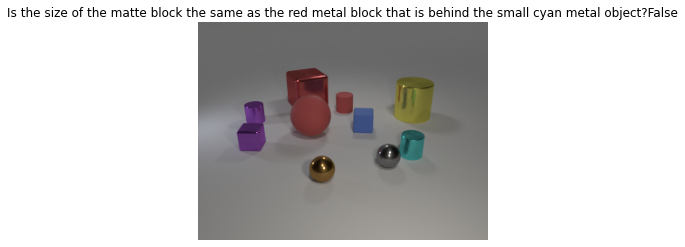

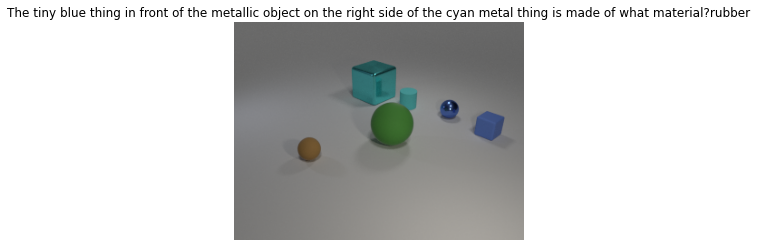

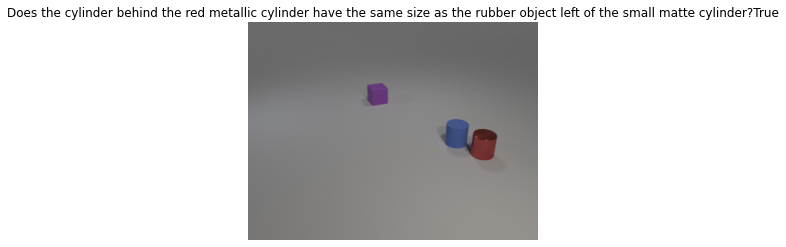

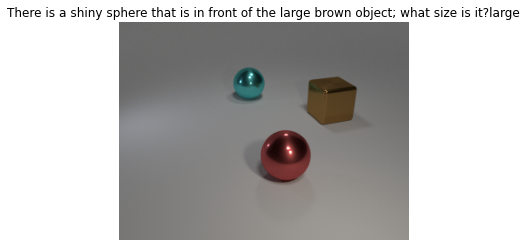

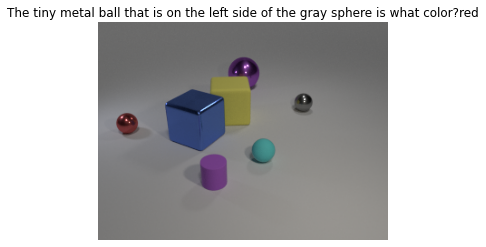

In [14]:
index = 0
for imgs, questions, scenes in dataloader:
    for img, question in zip(imgs, questions):
        index += 1
        plt.figure()
        plt.axis("off")
        plt.title(f'{question.question}{question.answer}')
        plt.imshow(img.permute(1, 2, 0))
    break